# __Desafio Spike__
#### Por: Alvaro Gonzalez M.
#### email: algonmag@gmail.com

##### Bibliotecas

In [75]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##### Directorio

In [6]:
os.chdir(os.getcwd()) #set directory
os.getcwd() #check directori

'C:\\Users\\algon\\OneDrive\\Desktop\\Spike'

### Preguntas

##### __1. Costo Marginales__

- Carga el archivo costo_marginal_real.csv. Estos son los costos marginales reales observados.

In [195]:
CMg_real = pd.read_csv('costo_marginal_real.csv') #upload data set

In [196]:
CMg_real.head() #head data set

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


In [140]:
CMg_real.shape #n of rows and columns

(4309951, 7)

In [141]:
CMg_real.barra_mnemotecnico.nunique() #unique values barra_mnemotecnico

1020

- Carga el archivo costo_marginal_programado.csv. Estos son los costos marginales previstos por el sistema.

In [142]:
CMg_prog = pd.read_csv('costo_marginal_programado.csv') #upload data set

In [143]:
CMg_prog.head() #head of the dataset

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,1,49.897334
1,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,2,50.471616
2,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,3,50.077821
3,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,4,49.796216
4,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,5,49.796216


In [144]:
CMg_prog.shape #shape of the dataframe

(1192124, 5)

In [145]:
CMg_prog.mnemotecnico_barra.nunique() #unique values mnemotecnico

239

- Haz un merge del costos marginal real con el costo marginal programado a nivel de barra (*Ayuda: la columna de join no se llama igual en ambas bases! Los datos venían así del SIC *). Llama a esta nueva base costo_marginal
<br>

##### <br> __Supuestos__ : En base a las siguentes preguntas voy a suponer que el row driver sera dado por la base de costos marginales reales, y el merge se tiene que hacer en base a nivel barra, dia y hora.
<br>

In [197]:
costo_marginal = pd.merge(CMg_real, CMg_prog, how='left', left_on =['barra_mnemotecnico','fecha','hora'],right_on=['mnemotecnico_barra','fecha','hora'])

In [198]:
costo_marginal.shape #shape of the resulting merge

(4322410, 10)

In [199]:
costo_marginal.columns #columns names

Index(['barra_mnemotecnico', 'barra_referencia_mnemotecnico', 'fecha', 'hora',
       'costo_en_dolares', 'costo_en_pesos', 'nombre', 'mnemotecnico_barra',
       'nombre_barra', 'costo'],
      dtype='object')

In [200]:
### renaming some columns
costo_marginal.rename(columns={"costo_en_dolares":"cmg_real","costo":"cmg_prog"},inplace=True)

In [208]:

costo_marginal.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,cmg_real,costo_en_pesos,nombre,mnemotecnico_barra,nombre_barra,cmg_prog
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV,NaN,NaN,NaN
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV,NaN,NaN,NaN
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1,NaN,NaN,NaN
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1,NaN,NaN,NaN
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1,NaN,NaN,NaN


- Realiza un análisis exploratorio de la base resultante. ¿Qué puedes decir de las distintas variables? ¿Cómo distribuyen? En particular analiza las barras (barra_mnemotecnico). ¿Para cuántas barras se programa el costo? ¿Qué porcentaje es del total de barras que puedes observar en la base?

In [201]:
costo_marginal.describe() # descriptive statistics

,hora,cmg_real,costo_en_pesos,cmg_prog
count,4.322410e+06,4.322410e+06,4.322410e+06,913388.000000
mean,1.250287e+01,6.369302e+01,4.299025e+01,61.888004
std,6.923986e+00,2.798696e+01,1.863687e+01,23.806896
min,1.000000e+00,0.000000e+00,0.000000e+00,-12.113677
25%,7.000000e+00,5.064000e+01,3.410226e+01,49.981588
50%,1.300000e+01,5.609000e+01,3.798623e+01,55.057527
75%,1.900000e+01,6.588000e+01,4.470807e+01,64.181228
max,2.500000e+01,1.109970e+03,7.343561e+02,610.600000


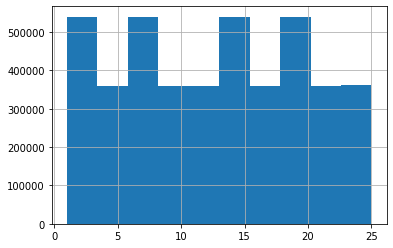

In [202]:
####Analisis hora
costo_marginal.hora.hist()

Para las horas se aprecia que se reportan costos por barra más en ciertas horas que en otras. Tanto las horas peak, como el resto son similiares entre si haciendo esta distinción. 

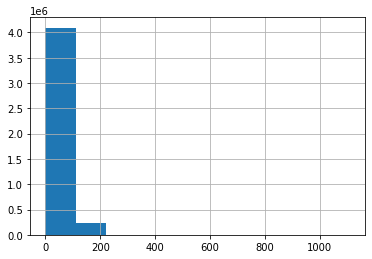

In [203]:
#### Anlsiis costo marginal real
costo_marginal.cmg_real.hist()

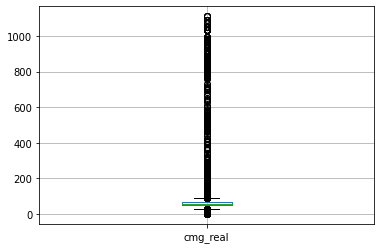

In [204]:
costo_marginal.boxplot(column='cmg_real')

Para los costos marginales reales se aprecia que la distribucion esta altamente skew hacia la izquierda, y el boxplot muestra que tiene varias obsevaciones que podrian considerarse outliers.

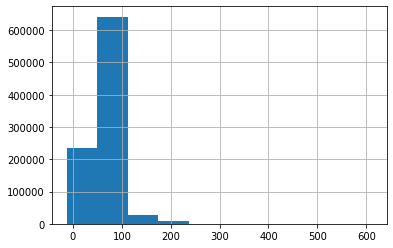

In [205]:
#### Anlsiis costo marginal programada
costo_marginal.cmg_prog.hist()

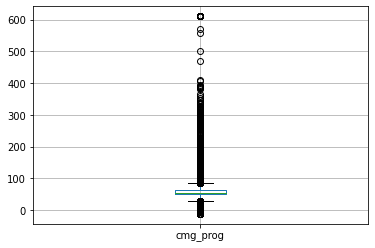

In [206]:
costo_marginal.boxplot(column='cmg_prog')

Para los costos marginales programados se aprecia que la distribucion esta altamente skew hacia la izquierda, y el boxplot muestra que tiene varias obsevaciones que podrian considerarse outliers. El analisis similar a la dos los costos reales, pero para esta variable se aprecia un menor numero de outliers y una menor asismetria

In [207]:
### barra_nemotecnico
#Supuesto: Voy a responder para cuantas barra condicionado a la fecha hora se pograma el costo
total_obs,_=costo_marginal.shape
total_con_costo_prog, _ = costo_marginal.dropna().shape
barras_unicas_sin_na = costo_marginal.dropna().mnemotecnico_barra.nunique()
barras_unicas_totales = costo_marginal.mnemotecnico_barra.nunique()

print('El numero total de barras por fecha y hora son: '"%i"%  (total_obs))
print('El porcentaje de barras por fecha y hora con costos programado es: ' "%.3f"%  (total_con_costo_prog/total_obs))
print('El total de barras por fecha y hora con costos programado para todas las obs es: ' "%i"%  (barras_unicas_sin_na))
print('El porcentaje de barras por fecha y hora con costos programado para todas las obs del total de barras unicas es: ' "%.3f"%  (barras_unicas_sin_na/barras_unicas_totales))

El numero total de barras por fecha y hora son: 4322410
El porcentaje de barras por fecha y hora con costos programado es: 0.211
El total de barras por fecha y hora con costos programado para todas las obs es: 220
El porcentaje de barras por fecha y hora con costos programado para todas las obs del total de barras unicas es: 1.000


##### __2. Construcción de variables__

In [209]:
#Voy a eliminar observaciones donde la columna cmg_prog sea igual a NaN
costo_marginal.dropna(how='any', subset=['cmg_prog'],inplace=True)
costo_marginal.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,cmg_real,costo_en_pesos,nombre,mnemotecnico_barra,nombre_barra,cmg_prog
13,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA S/E CENTRAL QUINTERO 220KV,BA01G021SE018G021,BA S/E CENTRAL QUINTERO 220KV,54.292145
16,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA S/E NUEVA PICHIRROPULLI 220KV B1,BA01T018SE001T018,BA S/E NUEVA PICHIRROPULLI 220KV B1,60.620648
20,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,BA02T005SE055T005,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,59.177969
24,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA S/E CENTRAL PEHUENCHE 220KV B1,BA01T002SE029T002,BA S/E CENTRAL PEHUENCHE 220KV B1,54.566605
28,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA S/E SAN CRISTOBAL 110KV B1,BA01R002SE041R002,BA S/E SAN CRISTOBAL 110KV B1,56.086260


In [210]:
costo_marginal.shape #dim of the data frame without NAN in cmg_prog

(913388, 10)

In [217]:
#voy a limpiar el data frame, eliminado columnas que no son necesario y eliminando rows donde la hora = 25 ya que no me hace sentido
costo_marginal_clean =  costo_marginal.drop(columns=['barra_referencia_mnemotecnico','costo_en_pesos','mnemotecnico_barra','nombre_barra','nombre'])

In [218]:
costo_marginal_clean = costo_marginal_clean[costo_marginal_clean.hora <=24]

In [224]:
#Voy agruopar barras duplicadas en fehca y hora
costo_marginal_clean = costo_marginal_clean.groupby(['barra_mnemotecnico','fecha','hora']).mean()

- desviación: la diferencia entre el costo real y el costo programado

In [225]:
costo_marginal_clean['desviacion'] = costo_marginal_clean['cmg_real'] - costo_marginal_clean['cmg_prog']

- desviación_pct: la misma desviación, pero en porcentaje

In [227]:
costo_marginal_clean['desviacion_pct'] = ((costo_marginal_clean['cmg_real'] - costo_marginal_clean['cmg_prog'])/costo_marginal_clean['cmg_prog'])*100

- desviacion_cat: una variable categórica que vale 1 si la desviación_pct absoluta es mayor a 15% (esto es, si es menor a -15% o mayor a 15%) 

In [231]:
costo_marginal_clean['desviacion_cat']= np.where(abs(costo_marginal_clean.desviacion_pct)  > 15,1,0)

In [234]:
costo_marginal_clean.desviacion_cat.describe()

count    900720.000000
mean          0.258450
std           0.437783
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: desviacion_cat, dtype: float64

Podemos apreciar que la cantidad de desvios es de aprozimadamente un 26% de la data, lo que implica que los label no estan balanceads, y es mas probable no ver un desvio

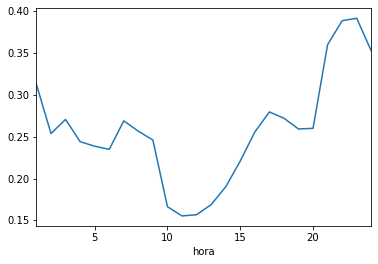

In [235]:
costo_marginal_clean.groupby(['hora']).mean()['desviacion_cat'].plot()

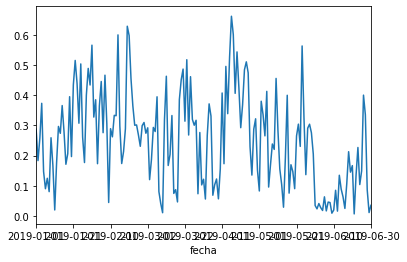

In [236]:
costo_marginal_clean.groupby(['fecha']).mean()['desviacion_cat'].plot()

Agregando los desvios por horas en el primer grafico y dias en el segundo se puede apreciar que los desvios tiene gran variabilidad dependiendo la hora del dia de la observacion y el dia. Hay horas donde el total de desvios supera el 40%  y en otras es aproximamente un 15%, mientras que hay dias donde supera el 60% y otros dias donde es menos del 5% de las obersvaciones

##### __3. Visualización de datos__

Crea la siguiente función: def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):

que tome como input el código de una barra y haga un plot en el tiempo del costo marginal real y del costo marginal programado. El eje x debe ser el tiempo. fecha_inicial y fecha_final_ dan los límites de este plot. Úsa esta función para plotear algunas barras.

In [271]:
#Creo que la funcion es mal planteada ya que tambien se deberia pasar el dataframe como variable, pero voy a escribirla segun como se pide.

def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    """
    Toma tres strings codigo_barra, fecha_inicial, y fecha_final.
    Y usando el dataframe definido como costo margianl devuelve un grafico de lineas entre las fechas señalas para
    el cmg real y cmg programado
    """
    df_codigo_barra = costo_marginal_clean.loc[codigo_barra]
    df_fechas = df_codigo_barra.loc[fecha_inicial:fecha_final]
    return df_fechas.plot(y=['cmg_real','cmg_prog'])
    

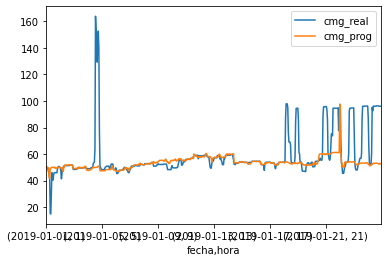

In [272]:
time_plot_costo_barra('BA01G021SE018G021','2019-01-01','2019-01-25' )

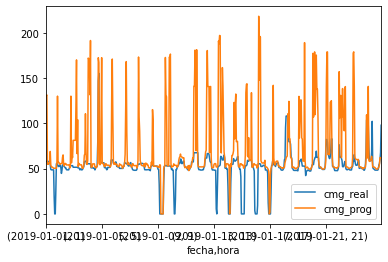

In [275]:
time_plot_costo_barra('BA28L134SE280T005','2019-01-01','2019-01-25' )

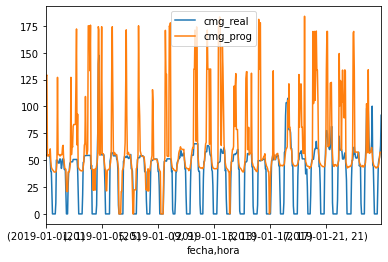

In [276]:
time_plot_costo_barra('BA01T002SE014T002','2019-01-01','2019-01-25' )

Qué puedes concluir de estos plots? <br>
Se puede apreciar de los tres graficos que plote, que cada bara tiene sus propio comportamiento tanto en cmg_real y cmg_promedio, y no se puede idetificar una tendencia clara.

Además, identifica la barra que tiene cmg_real= 0 durante todos los días y elimínala de tu dataset

In [302]:
df_aux = costo_marginal_clean.reset_index()
df_aux = pregunta[['barra_mnemotecnico','cmg_real']]
df_aux = df_aux.groupby('barra_mnemotecnico').sum()
df_aux = df_aux[df_aux.cmg_real==0]

In [303]:
###la barra con cmg_real cero es BA01G049SE001G049 	
df_aux

,cmg_real
barra_mnemotecnico,
BA01G049SE001G049,0.0


In [305]:
costo_marginal_clean.drop('BA01G049SE001G049',inplace=True)

##### __4. Base para los modelos__
Carga la base base_para_predicción.csv. Esta será la base principal para las siguientes preguntas.

In [3]:
base_predic = pd.read_csv('base_para_prediccion.csv')

In [4]:
base_predic.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


In [5]:
base_predic.shape

(112779, 15)

- En rasgos generales, ¿Qué puedes decir de los datos? (dimensiones, tipo de datos, variables categóricas, variables numéricas, fechas).

In [6]:
base_predic.dtypes

nemotecnico_se               object
fecha                        object
hora                          int64
gen_eolica_total_mwh        float64
gen_geotermica_total_mwh    float64
gen_hidraulica_total_mwh    float64
gen_solar_total_mwh         float64
gen_termica_total_mwh       float64
cmg_real                    float64
cmg_prog                    float64
cmg_desv                    float64
cmg_desv_pct                float64
n_barras                      int64
demanda_mwh                   int64
cap_inst_mw                 float64
dtype: object

In [8]:
base_predic.describe()

,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
count,112779.000000,0.0,0.0,34184.000000,41818.000000,61863.000000,112779.000000,112779.000000,112779.000000,112779.00,112779.000000,1.127790e+05,112779.000000
mean,12.502993,NaN,NaN,38.120053,3.764987,40.583146,61.170058,62.215400,-1.045338,inf,2.331844,6.357056e+07,128.719565
std,6.924090,NaN,NaN,69.838109,12.904388,101.083396,25.414147,25.307759,24.711575,NaN,1.304096,3.948683e+08,167.948649
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-1.713131,-562.470000,-3403.97,1.000000,-9.821095e+09,2.989800
25%,7.000000,NaN,NaN,0.849787,0.000000,0.000000,49.130000,49.906745,-3.790000,-7.07,1.000000,7.464800e+05,18.420000
50%,13.000000,NaN,NaN,9.600000,0.000000,0.000000,54.610000,55.420601,-0.310000,-0.58,2.000000,4.507282e+06,51.850000
75%,19.000000,NaN,NaN,40.000000,1.571022,15.960000,63.500000,64.701951,1.670000,2.92,3.000000,1.332345e+07,184.685500
max,25.000000,NaN,NaN,472.000000,86.050000,570.600800,240.360000,610.600000,175.020000,inf,6.000000,1.004240e+10,597.782800


Puedo decir que la mayoria de los datos son numericos. Hay 112779 observaciones y 15 columns . Hay variables de fecha y hora. Otras variables que se pueden agrupar en distintos tipos de generacion (eolica, geotermica, hidraulica, solar, termica). Hay distintos costos marginales y metricas similares a las que construimos en las preguntas anteriores. Nos dan datos de demanda y oferta por subestacion electrica. Diria que casi todas las variables son numericas, salvo por n_barras que es categorica y fechas y horas.

- A partir de la variable fecha, crea nuevas variables para el año, mes, semana del año, dia del calendario, dia de la semana y una variable que indique si el dia corresponde a un día de semana o fin de semana. Estas features/variables te servirán para entrenar el modelo.

In [24]:
#Year
base_predic['Year'] = pd.to_datetime(base_predic['fecha']).dt.to_period('Y')
#Month
base_predic['Month'] = pd.to_datetime(base_predic['fecha']).dt.month
#Week
base_predic['Week'] = pd.to_datetime(base_predic['fecha']).dt.week
#Day
base_predic['day'] = pd.to_datetime(base_predic['fecha']).dt.day
#Day Week
base_predic['W_day'] = pd.to_datetime(base_predic['fecha']).dt.dayofweek
#Week_day 1 if week day esle 0
base_predic['dum_week_day'] = np.where(base_predic['W_day']<=5,1,0)

C:\Users\algon\AppData\Roaming\Python\Python37\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


- Implementa una función que para una subestación y una variable, grafique múltiples series de tiempo diarias correspondientes a una lista de fechas. Para esto, la función debe recibir como argumentos: código de una subestación, una variable (serie numérica), y una lista de fechas (año-mes-día). Por ejemplo: para la subestación SE005T002 y la variable gen_solar_total_mwh, la función debe graficar los perfiles diarios de generación solar por hora para las fechas '2019-01-10', '2019-02-10' y '2019-03-10'.

In [43]:
###Necesito cambiar el formato de la fecha
base_predic['fecha'] = pd.to_datetime(base_predic['fecha']).apply(lambda x: str(x).split(' ')[0])

In [97]:
def plot_SE_Variable_dates(sub_estacion,variable,fechas):
    '''
    tomar un string con el codigo de subestacion, otro string con la variable de generacion, y un lista de fechas formato YYYY-DD-MM
    retorna un grafico por hora de las lista de fecha señaladas, del dataframe base_predic
    '''
    aux = {}
    for i in fechas:
        hora = base_predic[(base_predic['nemotecnico_se']==sub_estacion) & (base_predic['fecha']==i)][['hora',variable]]['hora'].tolist()
        var = base_predic[(base_predic['nemotecnico_se']==sub_estacion) & (base_predic['fecha']==i)][['hora',variable]][variable].tolist()
        sort_list = [(i,j) for i,j in zip(hora,var)]
        sort_list = sorted(sort_list,key=lambda tup:tup[0])
        sort_list = [j for i,j in sort_list]
        aux[i] = sort_list
    hora = [i for i in range(1,25)]
    for i,j in aux.items():
        x = hora
        y = j
        plt.plot(hora,y,label=i)
    
    plt.legend()
        

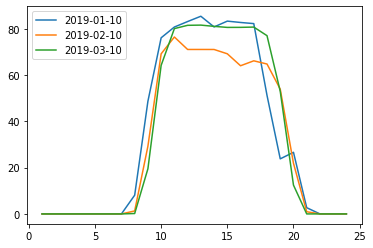

In [98]:
plot_SE_Variable_dates('SE005T002','gen_solar_total_mwh',['2019-01-10','2019-02-10','2019-03-10'])

- Grafica la curva de generación solar, por hora, en la subestación SE005T002 para las fechas del 10, 11, 12, 13 y 14 de enero de 2019. Haz lo mismo para la subestación SE127T005. Que podrías decir, en términos generales, sobre la generación solar y las dos subestaciones mencionadas, basados en estos dos gráficos?

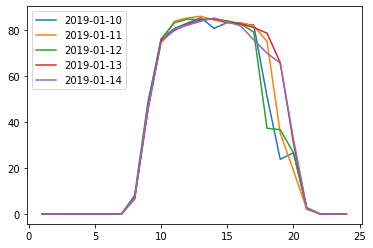

In [99]:
#Grafico 1
plot_SE_Variable_dates('SE005T002','gen_solar_total_mwh',['2019-01-10','2019-01-11','2019-01-12','2019-01-13','2019-01-14'])

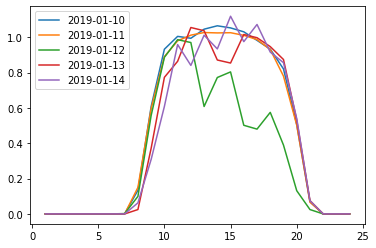

In [100]:
#Grafico 2
plot_SE_Variable_dates('SE127T005','gen_solar_total_mwh',['2019-01-10','2019-01-11','2019-01-12','2019-01-13','2019-01-14'])

En promedio la generacion electrica solar es ciclica para un dia dado. Esto es esperable ya que la generacion depende del ciclo del sol.

- Grafica la curva de generación térmica, por hora, en la subestación SE020G213 para los días 14, 15, 16 y 17 de mayo de 2019. Haz lo mismo para la subestación SE106G216. Que podrías decir, en términos generales, sobre la generación térmica en esta subestación con respecto a este gráfico?

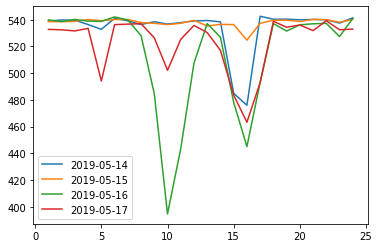

In [101]:
plot_SE_Variable_dates('SE020G213','gen_termica_total_mwh',['2019-05-14','2019-05-15','2019-05-16','2019-05-17'])

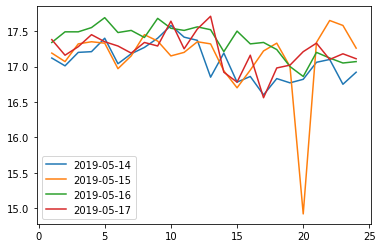

In [102]:
plot_SE_Variable_dates('SE106G216','gen_termica_total_mwh',['2019-05-14','2019-05-15','2019-05-16','2019-05-17'])

Puedo concluir que la generacion electrica termo electrica es bastante variable, problamente dependiente del costo marginal del sistema en ese momento

##### __5. Predicción de desviaciones del costo marginal: modelo 1__
<br>
- Definiria el scoping de este problema de la siguente manera. Primero habria que definir un offset que es un hiperametro de este ejercicios, ya que ex ante no sabemos por ejemplo cuanto lags debemos incluir en nuestro ejercicio, para encontrar el mejor modelo. El offset es importante ya que define las moving windows, los lag, estadisitcas acumuladas, y por tanto los train/test splits.
<br>
- Cada train/test split es evaluado segun una metrica predefinida que dependera de los recursos de nuestro cliente.
<br>
- Creo que para este ejercicio queremos enfocarnos en la metrica de precision, en aquellas top X SE que tienen mayor probabilidad de desviar.
<br>
- El top X depende de los recursoso de nuestros cliente, tal vez solo puede intervernir 10 o 20 o 30 SE por ahora.
<br>
- Hay que estimar varios modelos y algoritmos, por diferentes franjas de tiempo y quedarnos con aquellos que por ejemplo sean mas estable o mas certeros en el ultimo train/test split que tengamos. Eso dependera.
- Ha diferencia de obtener hiperarametros mediante un CV, aqui hay que probar distintas especificaciones del algoritmo y ver como se comportan.
<br>
Dicho lo anterior y considerando que este puede ser un porblema muy complejo, para el resto del ejercicio tomare un submuestra sin optimizar el offset. Queria plantear lo anterior ya que creo que si se deberia abordar el problema

- Crea una variable target que sea igual a cero cuando la variable cmg_desv_pct esté en el rango [-15,15], e igual uno para cualquier otro caso. Hint: recuerda que existen valores infinitos.

In [103]:
base_predic['target']= np.where(abs(base_predic.cmg_desv_pct)  > 15,1,0)

In [218]:
#Segun lo explicado en la primera parte de esta pregunta voy a trabajar con una submuestra de la data
data = base_predic[(base_predic.fecha>='2019-04-01') & (base_predic.fecha<='2019-06-30')]

Ahora crea los siguientes features:

    en_total_mwh: suma de las cinco series de generación.
    lags y estadísticas acumuladas (por ejemplo: promedio, varianza) de las variables que consideres relevantes.


In [219]:
data.fillna(0,inplace=True)
data['en_total_mwh'] =  data[['gen_eolica_total_mwh','gen_geotermica_total_mwh','gen_hidraulica_total_mwh','gen_solar_total_mwh','gen_termica_total_mwh']].sum(axis=1)

C:\Users\algon\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [220]:
#voy a dropear columns que creo no me serviran
data.drop(columns=['gen_eolica_total_mwh','gen_geotermica_total_mwh','gen_hidraulica_total_mwh','gen_solar_total_mwh','gen_termica_total_mwh','Year'],inplace=True)

C:\Users\algon\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [165]:
data.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'cmg_real', 'cmg_prog', 'cmg_desv',
       'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw', 'Month',
       'Week', 'day', 'W_day', 'dum_week_day', 'target', 'en_total_mwh'],
      dtype='object')

In [221]:
#laging algunas variables con tres lags
data = data.assign(**{'{} (t-{})'.format(col,t): data[col].shift(t)
              for t in range(1,4)
               for col in ['target','cmg_desv_pct']
              })

In [222]:
data.dropna(inplace =True)

In [213]:
#moving average para cmg_desv_pct 4 periodos y sum de desvios en 4 periodos
data['mean_desvios'] =  data[['cmg_desv_pct (t-1)','cmg_desv_pct (t-2)','cmg_desv_pct (t-3)','cmg_desv_pct']].mean(axis=1)
data['acum_desvios'] = data[['target (t-1)','target (t-2)','target (t-3)','target']].sum(axis=1)

- Entrena un modelo que prediga si existirá una desviación en la hora siguiente. Adecúa la variable target para hacer esto posible.

In [214]:
#new target
data['new_target'] = data['target'].shift(-1)

In [215]:
#drop el hora 24
data.dropna(inplace =True)

In [216]:
data.drop(columns=['nemotecnico_se','fecha'],inplace=True)

In [176]:
#voy a entrena un modelo usando toda la informacion hasta el dia 2019-06-30 a la hora 22, la hora 23 sera mi test
mask = ((data.fecha=='2019-06-30') & (data.hora==23))
train = data[~mask]
test = data[mask]
train.drop(columns=['nemotecnico_se','fecha'],inplace=True)
test.drop(columns=['nemotecnico_se','fecha'],inplace=True)
train.dropna(inplace=True)
test.dropna(inplace=True)

C:\Users\algon\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
#getting X_train,X_test,Y_train,Y_test
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]
test =test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]

train_X = train.loc[:,train.columns !='new_target'].to_numpy()
train_Y = train['new_target'].to_numpy()

test_X = test.loc[:,test.columns !='new_target'].to_numpy()
test_Y = test['new_target'].to_numpy()

In [185]:
train_X.shape

(57235, 23)

In [186]:
#voy a usar un random forest con hiperparametros a mi gusto 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000,max_features='auto',criterion='gini',max_depth=10)
rfc.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

- ¿Cómo le va a tu modelo? ¿En qué métricas te basas y por qué?

In [192]:
#obtengo la probabilidad de 1
Y_prob_predict = rfc.predict_proba(test_X)[:,1]

In [196]:
# me voy a basar en la presicion en aquellos 2 SE con mayor probabilidad de fallar. Quiero correctamene identificar estos para
# intervenir a tiempo
sort_index_mayor_prob = np.argsort(-Y_prob_predict)

In [200]:
# A mi modelo le va muy mal tiene precision cero, es incapaz de identificar al unico desvio en la muestra
test_Y[sort_index_mayor_prob][:2].sum()/2

0.0

In [202]:
#Para poder identificarlo tengo que tomar las cuatros mayores prob y poder lograr una precision de 25%
test_Y[sort_index_mayor_prob][:4].sum()/4

0.25

Mi modelo no es tan malo si considero que prevalence de la data es de 4%

- ¿Cuales son las variables más importantes que considera este modelo?

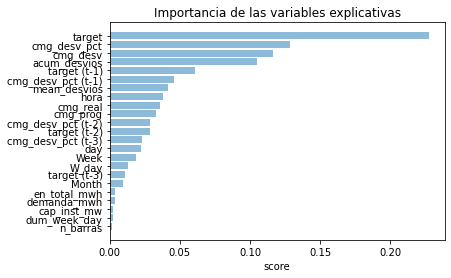

In [204]:
columns_names = train.loc[:,train.columns !='new_target'].columns
features_importance = np.argsort(rfc.feature_importances_)

feat =  columns_names[features_importance]
y_pos = np.arange(len(feat))
impt = rfc.feature_importances_[features_importance]

plt.barh(y_pos, impt, align='center', alpha=0.5)
plt.yticks(y_pos, feat)
plt.xlabel('score')
plt.title('Importancia de las variables explicativas')

plt.show()

La variables mas importantes estan asociadas a existian desvios en las horas inmediamente previas. En partigular target es la variable mas importante la cual es 1 si justo la hora previa existia un desvio.

##### __6. Predicción de desviaciones del costo marginal: modelo 2__

- Ahora imagina que te dicen que, en producción, te enviarán datos actualizados del sistema cada 12 horas. ¿Cuál debiese ser tu target a predecir en ese caso? Explica.
<br>
Creo que en este caso tendremos que ver si con la informacion del pasado podemos preveer si en la proximas 12 para un SE dado habra almenos 1 desvio. Esto dado a que si no contamos con informacion por hora se hace mas dificil predecir e incierto, ya que para hacer las estimaciones tendriamos que ir acumulando lo errores que vamos cometiendo.

- Entrena un nuevo modelo con ese target y evalúalo con una métrica que te parezca importante. ¿Cómo se compara con los resultados del modelo 1?

In [224]:
data_2 = base_predic[(base_predic.fecha>='2019-04-01') & (base_predic.fecha<='2019-06-30')]
data_2.fillna(0,inplace=True)
data_2['en_total_mwh'] =  data_2[['gen_eolica_total_mwh','gen_geotermica_total_mwh','gen_hidraulica_total_mwh','gen_solar_total_mwh','gen_termica_total_mwh']].sum(axis=1)

C:\Users\algon\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [226]:
data_2.drop(columns=['gen_eolica_total_mwh','gen_geotermica_total_mwh','gen_hidraulica_total_mwh','gen_solar_total_mwh','gen_termica_total_mwh','Year'],inplace=True)

C:\Users\algon\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [228]:
data_2
data_2 = data_2.assign(**{'{} (t+{})'.format(col,t): data[col].shift(-t)
              for t in range(1,13)
               for col in ['target']
              })

In [230]:
data_2.dropna(inplace=True)

In [238]:
data_2 = data_2.iloc[9:,]

In [263]:
data_2['new_target'] = data_2[['target (t+1)','target (t+2)','target (t+3)','target (t+4)','target (t+5)','target (t+6)','target (t+7)','target (t+8)','target (t+9)','target (t+10)','target (t+11)','target (t+12)']].sum(axis=1)

C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [266]:
data_2['new_target'] = np.where(data_2.new_target >0,1,0)

C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [268]:
data_2.drop(columns=['target (t+1)','target (t+2)','target (t+3)','target (t+4)','target (t+5)','target (t+6)','target (t+7)','target (t+8)','target (t+9)','target (t+10)','target (t+11)','target (t+12)'],inplace=True)

C:\Users\algon\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [271]:
mask = ((data_2.fecha=='2019-06-30') & (data_2.hora>=1))
train = data_2[~mask]
test = data_2[mask]
train.drop(columns=['nemotecnico_se','fecha'],inplace=True)
test.drop(columns=['nemotecnico_se','fecha'],inplace=True)
train.dropna(inplace=True)
test.dropna(inplace=True)
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]
test =test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]

C:\Users\algon\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [273]:
train_X = train.loc[:,train.columns !='new_target'].to_numpy()
train_Y = train['new_target'].to_numpy()

test_X = test.loc[:,test.columns !='new_target'].to_numpy()
test_Y = test['new_target'].to_numpy()

In [275]:
rfc = RandomForestClassifier(n_estimators=1000,max_features='auto',criterion='gini',max_depth=10)
rfc.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [276]:
Y_prob_predict = rfc.predict_proba(test_X)[:,1]

In [279]:
Y_prob_predict.shape

(564,)

In [284]:
test_Y.sum()/len(test_Y)

0.3333333333333333

In [285]:
#Similar a lo anterior evaluao segun precision. En el top 100 ya que el numero de positivos es sustancialmente mayor que con el anterior
sort_index_mayor_prob = np.argsort(-Y_prob_predict)
test_Y[sort_index_mayor_prob][:100].sum()/100

0.48

Logro encotrar el 48% de los 100 SE que es mas probable que tengan un desvio. Lo cual no es tan malo considerando que la prevalence del label positivo es del 33%. Con todo es dificil de comparar con el otro modelo ya que los target son distintos

##### __7. Merge con datos de clima: modelo 3__

In [286]:
clima = pd.read_csv('datos_clima.csv')

In [289]:
clima.dtypes

fecha                 object
subestacion           object
lat                  float64
lon                  float64
ALLSKY_SFC_SW_DWN    float64
KT                   float64
PRECTOT              float64
RH2M                 float64
T2M                  float64
T2MDEW               float64
T2M_MAX              float64
T2M_MIN              float64
TQV                  float64
TS                   float64
WS10M                float64
WS10M_MAX            float64
WS10M_MIN            float64
WS50M                float64
WS50M_MAX            float64
WS50M_MIN            float64
dtype: object

- ¿Cómo manejas el data leakage en este caso? 
<br>
LA unica forma de evitar data leakega es asegurarnos que estos datos estan en linea con cuando vemos los datos de costos mg, por lo tanto las mediciones se tienen que hacer acordes con las horas de medicion de los costos. Lamentablemente esto no lo podemos saber ya que no viene por hora. Otro problemas que tenemos es que nunca sabremos el clima a futuro por tanto no podemo usar datos reales, solo una prediccion de estos

In [292]:
clima['fecha'] = pd.to_datetime(clima['fecha']).apply(lambda x: str(x).split(' ')[0])

In [295]:
clima.columns, data_2.columns

(Index(['fecha', 'subestacion', 'lat', 'lon', 'ALLSKY_SFC_SW_DWN', 'KT',
        'PRECTOT', 'RH2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TQV', 'TS',
        'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN'],
       dtype='object'),
 Index(['nemotecnico_se', 'fecha', 'hora', 'cmg_real', 'cmg_prog', 'cmg_desv',
        'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw', 'Month',
        'Week', 'day', 'W_day', 'dum_week_day', 'target', 'en_total_mwh',
        'new_target'],
       dtype='object'))

¿Cuánto mejora la capacidad predictiva del modelo? ¿Cuáles variables son las más importantes?

In [297]:
data_3 = pd.merge(data_2, clima, how='left', left_on =['nemotecnico_se','fecha'],right_on=['subestacion','fecha'])

In [305]:
mask = ((data_3.fecha=='2019-06-30') & (data_2.hora>=1))
train = data_3[~mask]
test = data_3[mask]
train.drop(columns=['nemotecnico_se','fecha','subestacion'],inplace=True)
test.drop(columns=['nemotecnico_se','fecha','subestacion'],inplace=True)
train.dropna(inplace=True)
test.dropna(inplace=True)
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]
test =test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]

C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\algon\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\algon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\algon\Anaconda

In [306]:
train_X = train.loc[:,train.columns !='new_target'].to_numpy()
train_Y = train['new_target'].to_numpy()

test_X = test.loc[:,test.columns !='new_target'].to_numpy()
test_Y = test['new_target'].to_numpy()

rfc = RandomForestClassifier(n_estimators=1000,max_features='auto',criterion='gini',max_depth=10)
rfc.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [307]:
Y_prob_predict = rfc.predict_proba(test_X)[:,1]

In [308]:
test_Y.sum()/len(test_Y)

0.3524590163934426

In [309]:
#Similar a lo anterior evaluao segun precision. En el top 100 ya que el numero de positivos es sustancialmente mayor que con el anterior
sort_index_mayor_prob = np.argsort(-Y_prob_predict)
test_Y[sort_index_mayor_prob][:100].sum()/100

0.62

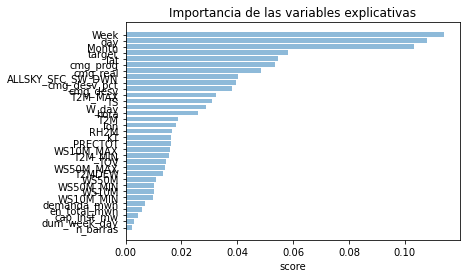

In [310]:
columns_names = train.loc[:,train.columns !='new_target'].columns
features_importance = np.argsort(rfc.feature_importances_)

feat =  columns_names[features_importance]
y_pos = np.arange(len(feat))
impt = rfc.feature_importances_[features_importance]

plt.barh(y_pos, impt, align='center', alpha=0.5)
plt.yticks(y_pos, feat)
plt.xlabel('score')
plt.title('Importancia de las variables explicativas')

plt.show()

La metrica mejora bastante, podemos predecir correctarmente el 62% de los desvios mas probables en las proxima 12 horas, que es mejor que el 48% que obtuvimos antes. Pero hay un problema de data leakege con las variables de clima. Podemos ver que las variables mas importantes son la semana y el dia, y luego hay varias variables relacionadas con el clima.

#### __8. Reflexión__

- ¿Por qué sería bueno utilizar un modelo como este para anticiparse a desvíos de precios de la energía?
<br> 
Por que en mi aproximacion al problema podemos definir cuantos desvios mas problables podemos arreglar, evitar o sacar provecho economico, condicionado a los recursos o riesgo que queramos correr (el top X queda definido por el cliente!). Ademas el modelo muestra que es mejor que hacerlo de manera aleatoria.
<br>
- ¿Qué casos de uso te imaginas podrían beneficiarse teniendo acceso a un modelo como este?
<br>
No soy un experto pero supongo que el coordinador electrico le gustaria evitar desvios ya que pueden ser costos, en ese caso el modelo le puede ayudar para intervenir. O tambien una empresa electrica podria sacar provecho economico si opera cuando hay desvios que le favorezcan, si no me equivoco el pago depende del cmg total del sistema
